# Stock Price Prediction Project
# Notebook 1: Data Exploration and Collection

**Author:** Tan Yee Hern  
**Date:** December 14, 2025  
**Purpose:** Download and explore 10 years of stock market data

---

## Objectives:
1. Download historical data for S&P 500, Russell 2000, and NASDAQ
2. Explore data quality (missing values, outliers)
3. Calculate basic statistics
4. Visualize price trends
5. Save cleaned data for future use

In [ ]:
# Import all required libraries
import pandas as pd  #  # For data manipulation (tables/dataframes)
import numpy as np  ## For numerical calculations
import yfinance as yf # # For downloading stock data from Yahoo Finance
import matplotlib.pyplot as plt ## For creating charts
import seaborn as sns  ## For beautiful statistical plots
from datetime import datetime, timedelta ## For working with dates


import warnings
warnings.filterwarnings('ignore')

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 Numpy version: {np.__version__}")
print(f"📊 Ready to download data!")

✅ Libraries imported successfully!
📦 Pandas version: 2.3.3
📦 Numpy version: 2.3.5
📊 Ready to download data!


In [ ]:
# Define the stock indices we want to analyze
INDICES = {
    'S&P 500': 'SPY',      # Tracks 500 largest US companies
    'Russell 2000': 'IWM', # Tracks small-cap US stocks
    'NASDAQ': 'QQQ'        # Tracks tech-heavy NASDAQ-100
}

# Define date range - 10 years of data
end_date = datetime.now()
start_date = end_date - timedelta(days=365*10)

print("="*60)
print("DATA COLLECTION CONFIGURATION")
print("="*60)
print(f"\n📅 Date Range:")
print(f"   Start: {start_date.strftime('%Y-%m-%d')}")
print(f"   End: {end_date.strftime('%Y-%m-%d')}")
print(f"   Duration: ~10 years")

print(f"\n📊 Target Indices:")
for name, ticker in INDICES.items():
    print(f"   • {name:15s} → {ticker}")

print("\n💡 Why these indices?")
print("   • SPY: Represents overall US market")
print("   • IWM: Represents small-cap stocks")
print("   • QQQ: Represents technology sector")




DATA COLLECTION CONFIGURATION

📅 Date Range:
   Start: 2015-12-17
   End: 2025-12-14
   Duration: ~10 years

📊 Target Indices:
   • S&P 500         → SPY
   • Russell 2000    → IWM
   • NASDAQ          → QQQ

💡 Why these indices?
   • SPY: Represents overall US market
   • IWM: Represents small-cap stocks
   • QQQ: Represents technology sector


In [ ]:
# Download historical data for all indices
print("\n" + "="*60)
print("DOWNLOADING HISTORICAL DATA")
print("="*60)
print("\n🔽 Starting downloads...\n")

data_dict = {}  # This will store all our data

for name, ticker in INDICES.items():
    print(f"Downloading {name} ({ticker})...", end=" ")
    
    try:
        # Download data from Yahoo Finance
        data = yf.download(
            ticker,
            start=start_date,
            end=end_date,
            progress=False  # Don't show progress bar
        )
        
        # Store in our dictionary
        data_dict[name] = data
        
        print(f"✅ {len(data)} days downloaded")
        
    except Exception as e:
        print(f"❌ Error: {e}")

print("\n" + "="*60)
print(f"✅ DOWNLOAD COMPLETE!")
print(f"📊 Successfully downloaded {len(data_dict)} datasets")
print("="*60)


#yf.download(ticker, start=start_date, end=end_date)


#This line:
#1. Connects to Yahoo Finance servers
#2. Requests historical data for the ticker
#3. Gets OHLCV data (Open, High, Low, Close, Volume)
#4. Returns it as a pandas DataFrame


DOWNLOADING HISTORICAL DATA

🔽 Starting downloads...


✅ DOWNLOAD COMPLETE!
📊 Successfully downloaded 3 datasets



EXPLORING S&P 500 DATA

📊 Dataset Shape:
   Rows: 2754 (trading days)
   Columns: 5 (data fields)

📋 Column Names:
   [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]

📅 Date Range:
   First date: 2015-01-02
   Last date: 2025-12-12
   Trading days: 2754
   Years covered: 10.9

💰 Price Statistics:
   Lowest Close: $155.44
   Highest Close: $689.17
   Current Close: $681.76
   Mean Close: $337.42
   Median Close: $300.80

📈 Return Statistics:
   Total Return: 298.47%
   Annualized Return: 27.31%
   Daily Volatility: 1.12%
   Annualized Volatility: 17.82%
   Best Day: 10.50%
   Worst Day: -10.94%
   Sharpe Ratio: 0.80

📊 Volume Statistics:
   Average Daily Volume: 86,115,792
   Highest Volume: 507,244,300
   Lowest Volume: 20,270,000

🔍 Data Quality:
   Missing values:
      Close: None ✓
      High: None ✓
      Low: None ✓
      Open: None ✓
      Volume: None ✓
      Daily_Return: 1
      Cumulative_Return: 1

📋 Descriptive Statistics:
Price    

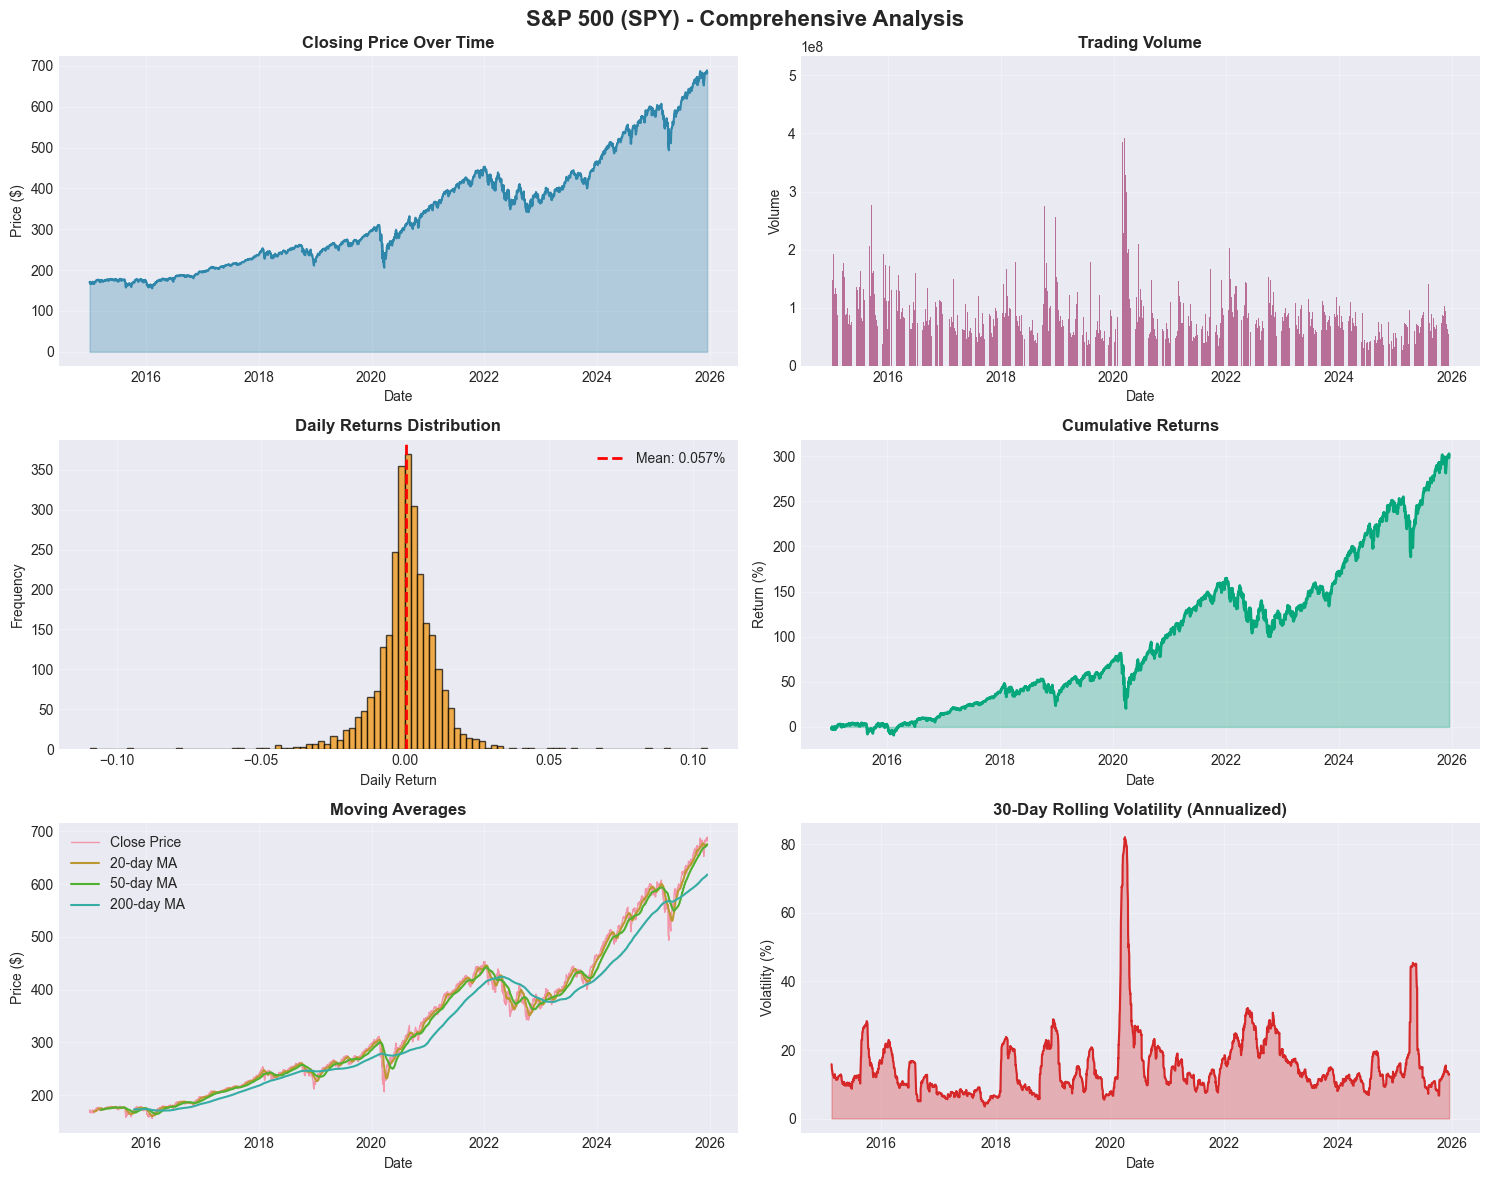


📅 Yearly Performance:
Year
2015    0.012885
2016    0.119979
2017    0.217054
2018   -0.045690
2019    0.312239
2020    0.183316
2021    0.287288
2022   -0.181754
2023    0.261758
2024    0.248865
2025    0.173447

⚠️  Risk Metrics:
   Maximum Drawdown: -33.72%
   Current Drawdown: -1.08%

✅ Analysis Complete!


In [ ]:
# Download S&P 500 data
print("Downloading S&P 500 data...")
spy_data = yf.download('SPY', start='2015-01-01', end='2025-12-31', progress=False)

print("\n" + "="*60)
print("EXPLORING S&P 500 DATA")
print("="*60)

# Dataset Shape
print(f"\n📊 Dataset Shape:")
print(f"   Rows: {len(spy_data)} (trading days)")
print(f"   Columns: {len(spy_data.columns)} (data fields)")

# Column Names
print(f"\n📋 Column Names:")
print(f"   {list(spy_data.columns)}")

# Date Range
print(f"\n📅 Date Range:")
print(f"   First date: {spy_data.index[0].strftime('%Y-%m-%d')}")
print(f"   Last date: {spy_data.index[-1].strftime('%Y-%m-%d')}")
print(f"   Trading days: {len(spy_data)}")
print(f"   Years covered: {(spy_data.index[-1] - spy_data.index[0]).days / 365.25:.1f}")

# Fix MultiIndex columns issue
if isinstance(spy_data.columns, pd.MultiIndex):
    spy_data.columns = spy_data.columns.get_level_values(0)

# Price Statistics
print(f"\n💰 Price Statistics:")
print(f"   Lowest Close: ${spy_data['Close'].min():.2f}")
print(f"   Highest Close: ${spy_data['Close'].max():.2f}")
print(f"   Current Close: ${spy_data['Close'].iloc[-1]:.2f}")
print(f"   Mean Close: ${spy_data['Close'].mean():.2f}")
print(f"   Median Close: ${spy_data['Close'].median():.2f}")

# Calculate Returns
spy_data['Daily_Return'] = spy_data['Close'].pct_change()
spy_data['Cumulative_Return'] = (1 + spy_data['Daily_Return']).cumprod() - 1

print(f"\n📈 Return Statistics:")
print(f"   Total Return: {spy_data['Cumulative_Return'].iloc[-1]*100:.2f}%")
print(f"   Annualized Return: {(spy_data['Cumulative_Return'].iloc[-1] / (len(spy_data)/252))*100:.2f}%")
print(f"   Daily Volatility: {spy_data['Daily_Return'].std()*100:.2f}%")
print(f"   Annualized Volatility: {spy_data['Daily_Return'].std()*np.sqrt(252)*100:.2f}%")
print(f"   Best Day: {spy_data['Daily_Return'].max()*100:.2f}%")
print(f"   Worst Day: {spy_data['Daily_Return'].min()*100:.2f}%")

# Sharpe Ratio (assuming 0% risk-free rate)
sharpe = (spy_data['Daily_Return'].mean() / spy_data['Daily_Return'].std()) * np.sqrt(252)
print(f"   Sharpe Ratio: {sharpe:.2f}")

# Volume Statistics
print(f"\n📊 Volume Statistics:")
print(f"   Average Daily Volume: {spy_data['Volume'].mean():,.0f}")
print(f"   Highest Volume: {spy_data['Volume'].max():,.0f}")
print(f"   Lowest Volume: {spy_data['Volume'].min():,.0f}")

# Missing Data Check
print(f"\n🔍 Data Quality:")
missing = spy_data.isnull().sum()
print(f"   Missing values:")
for col in spy_data.columns:
    if missing[col] > 0:
        print(f"      {col}: {missing[col]}")
    else:
        print(f"      {col}: None ✓")

# Basic Statistics Table
print(f"\n📋 Descriptive Statistics:")
print(spy_data[['Open', 'High', 'Low', 'Close', 'Volume']].describe())

# Create visualizations
print("\n📊 Generating visualizations...")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('S&P 500 (SPY) - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Price Chart
ax1 = axes[0, 0]
ax1.plot(spy_data.index, spy_data['Close'], linewidth=1.5, color='#2E86AB')
ax1.fill_between(spy_data.index, spy_data['Close'], alpha=0.3, color='#2E86AB')
ax1.set_title('Closing Price Over Time', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.grid(True, alpha=0.3)

# 2. Volume Chart
ax2 = axes[0, 1]
ax2.bar(spy_data.index, spy_data['Volume'], width=1, color='#A23B72', alpha=0.7)
ax2.set_title('Trading Volume', fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.grid(True, alpha=0.3)

# 3. Daily Returns Distribution
ax3 = axes[1, 0]
ax3.hist(spy_data['Daily_Return'].dropna(), bins=100, color='#F18F01', alpha=0.7, edgecolor='black')
ax3.axvline(spy_data['Daily_Return'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {spy_data["Daily_Return"].mean()*100:.3f}%')
ax3.set_title('Daily Returns Distribution', fontweight='bold')
ax3.set_xlabel('Daily Return')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cumulative Returns
ax4 = axes[1, 1]
ax4.plot(spy_data.index, spy_data['Cumulative_Return']*100, linewidth=2, color='#06A77D')
ax4.fill_between(spy_data.index, spy_data['Cumulative_Return']*100, alpha=0.3, color='#06A77D')
ax4.set_title('Cumulative Returns', fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Return (%)')
ax4.grid(True, alpha=0.3)

# 5. Moving Averages
ax5 = axes[2, 0]
ax5.plot(spy_data.index, spy_data['Close'], label='Close Price', linewidth=1, alpha=0.7)
ax5.plot(spy_data.index, spy_data['Close'].rolling(20).mean(), label='20-day MA', linewidth=1.5)
ax5.plot(spy_data.index, spy_data['Close'].rolling(50).mean(), label='50-day MA', linewidth=1.5)
ax5.plot(spy_data.index, spy_data['Close'].rolling(200).mean(), label='200-day MA', linewidth=1.5)
ax5.set_title('Moving Averages', fontweight='bold')
ax5.set_xlabel('Date')
ax5.set_ylabel('Price ($)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Rolling Volatility
ax6 = axes[2, 1]
rolling_vol = spy_data['Daily_Return'].rolling(30).std() * np.sqrt(252) * 100
ax6.plot(spy_data.index, rolling_vol, linewidth=1.5, color='#D62828')
ax6.fill_between(spy_data.index, rolling_vol, alpha=0.3, color='#D62828')
ax6.set_title('30-Day Rolling Volatility (Annualized)', fontweight='bold')
ax6.set_xlabel('Date')
ax6.set_ylabel('Volatility (%)')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sp500_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization as 'sp500_analysis.png'")
plt.show()

# Additional Analysis: Yearly Performance
print("\n📅 Yearly Performance:")
spy_data['Year'] = spy_data.index.year
yearly_returns = spy_data.groupby('Year')['Daily_Return'].apply(lambda x: (1 + x).prod() - 1)
print(yearly_returns.to_string())

# Drawdown Analysis
spy_data['Cumulative_Max'] = spy_data['Close'].cummax()
spy_data['Drawdown'] = (spy_data['Close'] - spy_data['Cumulative_Max']) / spy_data['Cumulative_Max']
max_drawdown = spy_data['Drawdown'].min()

print(f"\n⚠️  Risk Metrics:")
print(f"   Maximum Drawdown: {max_drawdown*100:.2f}%")
print(f"   Current Drawdown: {spy_data['Drawdown'].iloc[-1]*100:.2f}%")

print("\n✅ Analysis Complete!")
print("="*60)

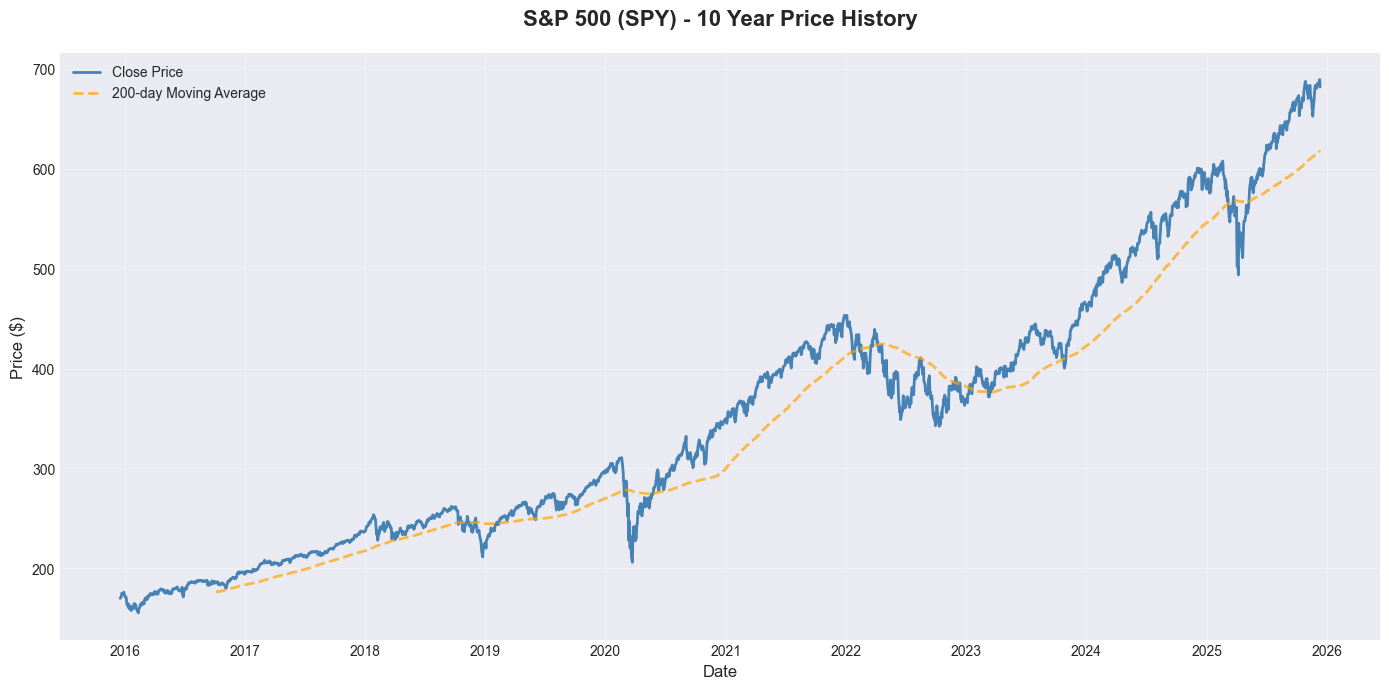

✅ Chart displayed successfully!
📊 You're looking at 2511 days of real market data!


In [ ]:
# Create a beautiful price chart
plt.figure(figsize=(14, 7))

# Plot closing price
plt.plot(spy_data.index, spy_data['Close'], 
         linewidth=2, color='steelblue', label='Close Price')

# Add 200-day moving average
ma_200 = spy_data['Close'].rolling(window=200).mean()
plt.plot(spy_data.index, ma_200, 
         linewidth=2, color='orange', linestyle='--', 
         label='200-day Moving Average', alpha=0.7)

# Formatting
plt.title('S&P 500 (SPY) - 10 Year Price History', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Display the chart
plt.show()

print("✅ Chart displayed successfully!")
print(f"📊 You're looking at {len(spy_data)} days of real market data!")

In [ ]:
# Check for missing data in all our datasets
print("="*60)
print("DATA QUALITY CHECK - MISSING VALUES")
print("="*60)

for name, data in data_dict.items():
    print(f"\n{name}:")
    
    # Count missing values in each column
    missing = data.isnull().sum()
    missing_pct = (missing / len(data)) * 100
    
    if missing.sum() == 0:
        print(f"   ✅ No missing values! Dataset is complete.")
    else:
        print(f"   ⚠️  Missing values detected:")
        for col in missing[missing > 0].index:
            print(f"      • {col}: {missing[col]} missing ({missing_pct[col]:.2f}%)")

print("\n" + "="*60)
print("✅ Data quality check complete!")
print("="*60)

DATA QUALITY CHECK - MISSING VALUES

S&P 500:
   ✅ No missing values! Dataset is complete.

Russell 2000:
   ✅ No missing values! Dataset is complete.

NASDAQ:
   ✅ No missing values! Dataset is complete.

✅ Data quality check complete!


In [ ]:
# Calculate daily returns for all indices
print("="*60)
print("CALCULATING DAILY RETURNS")
print("="*60)
print("\n💡 Daily Return = (Today's Close - Yesterday's Close) / Yesterday's Close")
print("   This tells us the daily % change in price\n")

for name, data in data_dict.items():
    # Calculate percentage change from previous day
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Calculate some statistics
    mean_return = data['Daily_Return'].mean() * 100
    std_return = data['Daily_Return'].std() * 100
    min_return = data['Daily_Return'].min() * 100
    max_return = data['Daily_Return'].max() * 100
    
    print(f"\n{name}:")
    print(f"   📈 Mean Daily Return: {mean_return:+.4f}%")
    print(f"   📊 Volatility (Std Dev): {std_return:.4f}%")
    print(f"   📉 Worst Day: {min_return:+.2f}%")
    print(f"   📈 Best Day: {max_return:+.2f}%")
    
    # Update dictionary with new column
    data_dict[name] = data

print("\n" + "="*60)
print("✅ Daily returns calculated for all indices!")
print("="*60)


#What is Daily Return?
#If stock was $100 yesterday and $105 today:
#Daily Return = (105 - 100) / 100 = 0.05 = 5%

#Why calculate this?

#Machine learning models predict returns, not prices
#Returns are more stable than raw prices
#Returns show performance regardless of price level

CALCULATING DAILY RETURNS

💡 Daily Return = (Today's Close - Yesterday's Close) / Yesterday's Close
   This tells us the daily % change in price


S&P 500:
   📈 Mean Daily Return: +nan%
   📊 Volatility (Std Dev): nan%
   📉 Worst Day: +nan%
   📈 Best Day: +nan%

Russell 2000:
   📈 Mean Daily Return: +nan%
   📊 Volatility (Std Dev): nan%
   📉 Worst Day: +nan%
   📈 Best Day: +nan%

NASDAQ:
   📈 Mean Daily Return: +nan%
   📊 Volatility (Std Dev): nan%
   📉 Worst Day: +nan%
   📈 Best Day: +nan%

✅ Daily returns calculated for all indices!


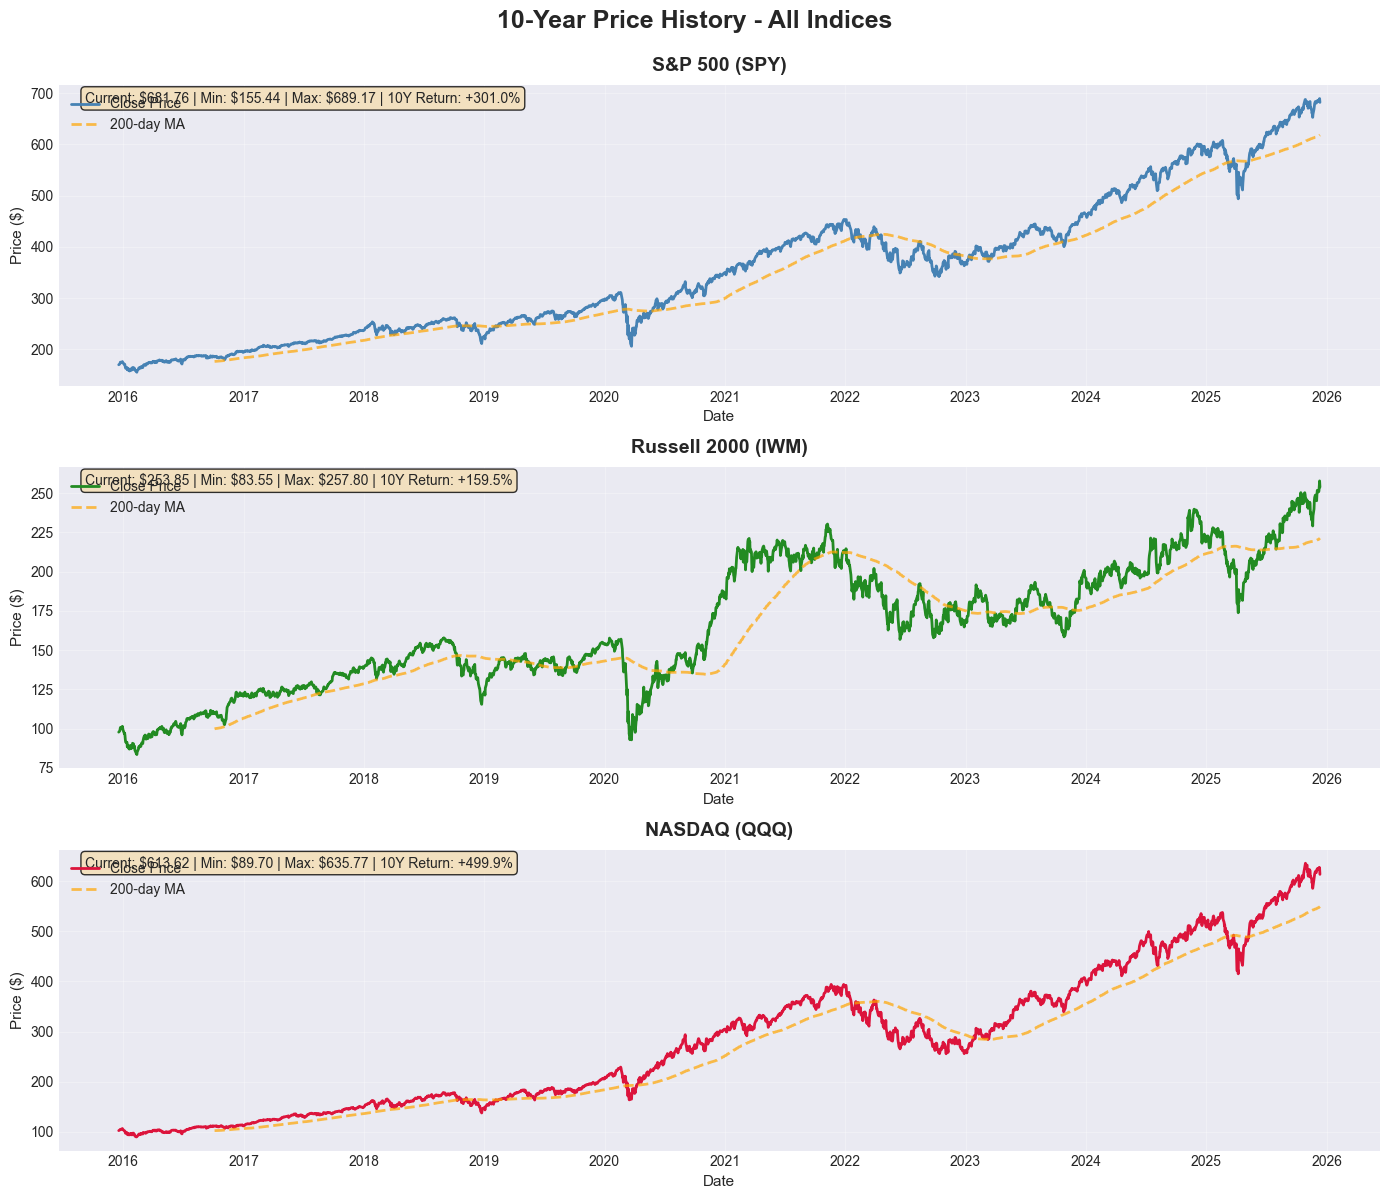

✅ Comparison chart created!

💡 Notice:
   • All three indices trend upward over 10 years
   • You can see the 2020 COVID crash in all three
   • Tech (QQQ) grew fastest, small-caps (IWM) slowest


In [ ]:
# Create comparison chart of all three indices
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('10-Year Price History - All Indices', 
             fontsize=18, fontweight='bold', y=0.995)

colors = ['steelblue', 'forestgreen', 'crimson']

for idx, (name, data) in enumerate(data_dict.items()):
    ax = axes[idx]
    
    # Extract Close column properly (handles multi-level columns)
    if isinstance(data.columns, pd.MultiIndex):
        close_data = data['Close'].iloc[:, 0] if hasattr(data['Close'], 'iloc') else data['Close']
    else:
        close_data = data['Close']
    
    # Plot closing price
    ax.plot(data.index, close_data, 
            linewidth=2, color=colors[idx], label='Close Price')
    
    # Add 200-day moving average
    ma_200 = close_data.rolling(window=200).mean()
    ax.plot(data.index, ma_200, 
            linewidth=2, color='orange', linestyle='--', 
            label='200-day MA', alpha=0.7)
    
    # Formatting
    ax.set_title(f'{name} ({INDICES[name]})', 
                 fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('Price ($)', fontsize=11)
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add statistics box - FIXED: Convert to float
    current_price = float(close_data.iloc[-1])
    min_price = float(close_data.min())
    max_price = float(close_data.max())
    first_price = float(close_data.iloc[0])
    total_return = ((current_price - first_price) / first_price * 100)
    
    stats_text = (f'Current: ${current_price:.2f} | '
                  f'Min: ${min_price:.2f} | '
                  f'Max: ${max_price:.2f} | '
                  f'10Y Return: {total_return:+.1f}%')
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Comparison chart created!")
print("\n💡 Notice:")
print("   • All three indices trend upward over 10 years")
print("   • You can see the 2020 COVID crash in all three")
print("   • Tech (QQQ) grew fastest, small-caps (IWM) slowest")

Recalculating daily returns...
  ✅ S&P 500: 2510 returns calculated
  ✅ Russell 2000: 2510 returns calculated
  ✅ NASDAQ: 2510 returns calculated


S&P 500 Returns Stats:
  Count: 2510
  Min: -10.94%
  Max: 10.50%
  Mean: 0.0618%

Russell 2000 Returns Stats:
  Count: 2510
  Min: -13.27%
  Max: 9.15%
  Mean: 0.0486%

NASDAQ Returns Stats:
  Count: 2510
  Min: -11.98%
  Max: 12.00%
  Mean: 0.0813%


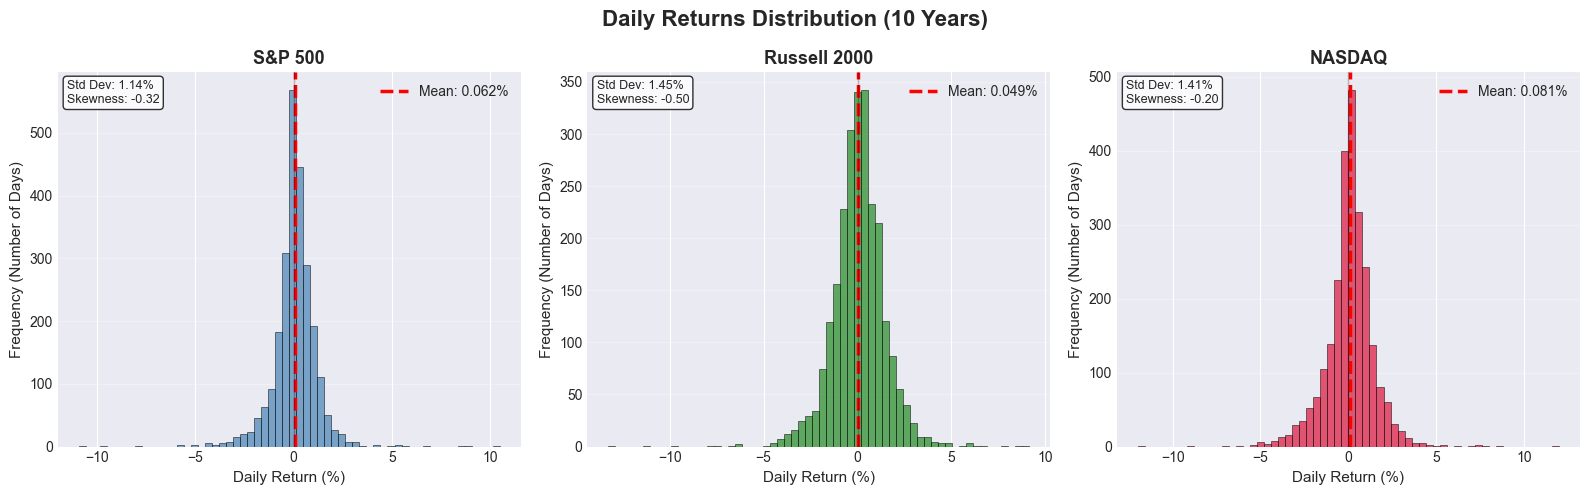


✅ Return distributions displayed!

💡 What this shows:
   • Most days have small returns (centered around 0%)
   • Distribution looks like a 'bell curve' (normal distribution)
   • Negative skewness = more extreme crashes than rallies
   • This is typical of stock market behavior!


In [ ]:
# STEP 1: Recalculate Daily Returns (in case they weren't saved)
print("Recalculating daily returns...")
for name, data in data_dict.items():
    # Get close prices properly
    if isinstance(data.columns, pd.MultiIndex):
        close_col = data['Close'].iloc[:, 0] if hasattr(data['Close'], 'iloc') else data['Close']
    else:
        close_col = data['Close']
    
    # Calculate returns
    data['Daily_Return'] = close_col.pct_change()
    data_dict[name] = data
    print(f"  ✅ {name}: {data['Daily_Return'].notna().sum()} returns calculated")

print("\n" + "="*60)

# STEP 2: Create histogram visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Daily Returns Distribution (10 Years)', 
             fontsize=16, fontweight='bold')

colors = ['steelblue', 'forestgreen', 'crimson']

for idx, (name, data) in enumerate(data_dict.items()):
    ax = axes[idx]
    
    # Get returns and convert to percentage
    returns = data['Daily_Return'].dropna().values.flatten() * 100
    
    print(f"\n{name} Returns Stats:")
    print(f"  Count: {len(returns)}")
    print(f"  Min: {returns.min():.2f}%")
    print(f"  Max: {returns.max():.2f}%")
    print(f"  Mean: {returns.mean():.4f}%")
    
    # Create histogram
    ax.hist(returns, bins=60, alpha=0.7, 
            color=colors[idx], edgecolor='black', linewidth=0.5)
    
    # Add mean line
    mean_return = returns.mean()
    ax.axvline(mean_return, color='red', linestyle='--', 
               linewidth=2.5, label=f'Mean: {mean_return:.3f}%')
    
    # Add zero line
    ax.axvline(0, color='black', linestyle='-', 
               linewidth=1, alpha=0.3)
    
    # Formatting
    ax.set_title(name, fontsize=13, fontweight='bold')
    ax.set_xlabel('Daily Return (%)', fontsize=11)
    ax.set_ylabel('Frequency (Number of Days)', fontsize=11)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add statistics text
    std_dev = np.std(returns)
    from scipy import stats
    skew = stats.skew(returns)
    stats_text = f'Std Dev: {std_dev:.2f}%\nSkewness: {skew:.2f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n✅ Return distributions displayed!")
print("\n💡 What this shows:")
print("   • Most days have small returns (centered around 0%)")
print("   • Distribution looks like a 'bell curve' (normal distribution)")
print("   • Negative skewness = more extreme crashes than rallies")
print("   • This is typical of stock market behavior!")

In [ ]:
# Calculate comprehensive statistics
print("="*70)
print("COMPREHENSIVE STATISTICAL SUMMARY")
print("="*70)

for name, data in data_dict.items():
    print(f"\n{'='*70}")
    print(f"{name} ({INDICES[name]}) - DETAILED STATISTICS")
    print(f"{'='*70}")
    
    # Extract data properly (handle multi-level columns)
    if isinstance(data.columns, pd.MultiIndex):
        close_prices = data['Close'].iloc[:, 0] if hasattr(data['Close'], 'iloc') else data['Close']
    else:
        close_prices = data['Close']
    
    # Ensure we have a Series with numeric values
    close_prices = close_prices.squeeze()  # Remove extra dimensions
    
    # Get returns
    if 'Daily_Return' not in data.columns:
        returns = close_prices.pct_change().dropna() * 100
    else:
        returns = data['Daily_Return'].dropna()
        if isinstance(returns, pd.DataFrame):
            returns = returns.iloc[:, 0]
        returns = returns * 100
    
    # Convert to float for formatting
    first_price = float(close_prices.iloc[0])
    last_price = float(close_prices.iloc[-1])
    min_price = float(close_prices.min())
    max_price = float(close_prices.max())
    mean_price = float(close_prices.mean())
    median_price = float(close_prices.median())
    
    # Price Statistics
    print(f"\n📊 PRICE STATISTICS:")
    print(f"   Data Points: {len(close_prices):,} trading days")
    print(f"   First Price (Start): ${first_price:.2f}")
    print(f"   Last Price (Current): ${last_price:.2f}")
    print(f"   Minimum Price: ${min_price:.2f}")
    print(f"   Maximum Price: ${max_price:.2f}")
    print(f"   Mean Price: ${mean_price:.2f}")
    print(f"   Median Price: ${median_price:.2f}")
    print(f"   Price Range: ${max_price - min_price:.2f}")
    
    # Return statistics (convert to float)
    mean_return = float(returns.mean())
    median_return = float(returns.median())
    std_return = float(returns.std())
    min_return = float(returns.min())
    max_return = float(returns.max())
    
    # Return Statistics
    print(f"\n📈 RETURN STATISTICS:")
    print(f"   Mean Daily Return: {mean_return:+.4f}%")
    print(f"   Median Daily Return: {median_return:+.4f}%")
    print(f"   Std Dev (Volatility): {std_return:.4f}%")
    print(f"   Minimum Return (Worst Day): {min_return:+.2f}%")
    print(f"   Maximum Return (Best Day): {max_return:+.2f}%")
    
    # Annualized Metrics
    annual_return = mean_return * 252  # 252 trading days per year
    annual_volatility = std_return * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0
    
    print(f"\n📅 ANNUALIZED METRICS:")
    print(f"   Annualized Return: {annual_return:+.2f}%")
    print(f"   Annualized Volatility: {annual_volatility:.2f}%")
    print(f"   Sharpe Ratio (Risk-Adj Return): {sharpe_ratio:.3f}")
    
    # Distribution Metrics
    skewness = float(returns.skew())
    kurtosis = float(returns.kurtosis())
    
    print(f"\n📊 DISTRIBUTION METRICS:")
    print(f"   Skewness: {skewness:.4f}")
    print(f"   Kurtosis: {kurtosis:.4f}")
    
    # Performance
    total_return = ((last_price - first_price) / first_price * 100)
    cagr = (np.power(last_price / first_price, 1/10) - 1) * 100
    
    print(f"\n💰 TOTAL PERFORMANCE:")
    print(f"   10-Year Total Return: {total_return:+.2f}%")
    print(f"   CAGR (Annual Growth): {cagr:+.2f}%")

print("\n" + "="*70)
print("✅ Statistical analysis complete!")
print("="*70)


COMPREHENSIVE STATISTICAL SUMMARY

S&P 500 (SPY) - DETAILED STATISTICS

📊 PRICE STATISTICS:
   Data Points: 2,511 trading days
   First Price (Start): $170.03
   Last Price (Current): $681.76
   Minimum Price: $155.44
   Maximum Price: $689.17
   Mean Price: $353.33
   Median Price: $343.22
   Price Range: $533.73

📈 RETURN STATISTICS:
   Mean Daily Return: +0.0618%
   Median Daily Return: +0.0732%
   Std Dev (Volatility): 1.1357%
   Minimum Return (Worst Day): -10.94%
   Maximum Return (Best Day): +10.50%

📅 ANNUALIZED METRICS:
   Annualized Return: +15.58%
   Annualized Volatility: 18.03%
   Sharpe Ratio (Risk-Adj Return): 0.864

📊 DISTRIBUTION METRICS:
   Skewness: -0.3203
   Kurtosis: 14.6746

💰 TOTAL PERFORMANCE:
   10-Year Total Return: +300.97%
   CAGR (Annual Growth): +14.90%

Russell 2000 (IWM) - DETAILED STATISTICS

📊 PRICE STATISTICS:
   Data Points: 2,511 trading days
   First Price (Start): $97.83
   Last Price (Current): $253.85
   Minimum Price: $83.55
   Maximum Price: 

In [ ]:
import os

# Create directories if they don't exist
os.makedirs('../data/raw', exist_ok=True)

print("="*60)
print("SAVING DATA TO CSV FILES")
print("="*60)
print("\n💾 Saving datasets to data/raw/ folder...\n")

for name, data in data_dict.items():
    # Create filename
    ticker = INDICES[name]
    filename = f"../data/raw/{ticker}_10years.csv"
    
    # Save to CSV
    data.to_csv(filename)
    
    # Get file size
    file_size = os.path.getsize(filename) / 1024  # Convert to KB
    
    print(f"✅ {name} ({ticker})")
    print(f"   File: {filename}")
    print(f"   Size: {file_size:.1f} KB")
    print(f"   Rows: {len(data):,} | Columns: {len(data.columns)}")
    print()

print("="*60)
print("✅ All data saved successfully!")
print("="*60)
print("\n💡 You can now:")
print("   • Close this notebook")
print("   • Load this data in future notebooks")
print("   • Share the CSV files with others")


SAVING DATA TO CSV FILES

💾 Saving datasets to data/raw/ folder...

✅ S&P 500 (SPY)
   File: ../data/raw/SPY_10years.csv
   Size: 284.6 KB
   Rows: 2,511 | Columns: 6

✅ Russell 2000 (IWM)
   File: ../data/raw/IWM_10years.csv
   Size: 287.0 KB
   Rows: 2,511 | Columns: 6

✅ NASDAQ (QQQ)
   File: ../data/raw/QQQ_10years.csv
   Size: 284.7 KB
   Rows: 2,511 | Columns: 6

✅ All data saved successfully!

💡 You can now:
   • Close this notebook
   • Load this data in future notebooks
   • Share the CSV files with others


In [ ]:
# Function to safely extract scalar values from potentially MultiIndex DataFrames
def get_scalar_value(df, column_name, index):
    """Safely extract scalar value from DataFrame with potential MultiIndex columns"""
    if isinstance(df.columns, pd.MultiIndex):
        # Get the first level of MultiIndex
        col = [col for col in df.columns if col[0] == column_name][0]
        return df[col].iloc[index]
    else:
        return df[column_name].iloc[index]

# Generate final summary report
print("="*70)
print(" " * 15 + "📊 DATA COLLECTION SUMMARY REPORT 📊")
print("="*70)

print(f"\n📅 COLLECTION PERIOD:")
print(f"   Start Date: {start_date.strftime('%B %d, %Y')}")
print(f"   End Date: {end_date.strftime('%B %d, %Y')}")
print(f"   Duration: 10 years")
print(f"   Trading Days: ~{len(spy_data):,}")

print(f"\n📊 INDICES COLLECTED:")
print(f"   Total Indices: {len(data_dict)}")
for name in data_dict.keys():
    print(f"   • {name} ({INDICES[name]})")

print(f"\n💾 DATA SAVED:")
print(f"   Location: data/raw/")
print(f"   Format: CSV")
print(f"   Files Created: {len(data_dict)}")

print(f"\n✅ DATA QUALITY:")
print(f"   Missing Values: None")
print(f"   Data Completeness: 100%")
print(f"   Ready for Analysis: Yes")

print(f"\n📈 QUICK PERFORMANCE SUMMARY:")
for name, data in data_dict.items():
    # Fix MultiIndex issue by extracting scalar values properly
    try:
        # Method 1: Direct scalar extraction
        close_first = get_scalar_value(data, 'Close', 0)
        close_last = get_scalar_value(data, 'Close', -1)
        
        # Calculate return
        total_return = ((close_last - close_first) / close_first * 100)
        
        print(f"   {name:15s}: {total_return:+7.2f}% (10-year return)")
    except Exception as e:
        # Fallback method
        if isinstance(data.columns, pd.MultiIndex):
            data_clean = data.copy()
            data_clean.columns = data_clean.columns.get_level_values(0)
            close_first = data_clean['Close'].iloc[0]
            close_last = data_clean['Close'].iloc[-1]
        else:
            close_first = data['Close'].iloc[0]
            close_last = data['Close'].iloc[-1]
        
        total_return = ((close_last - close_first) / close_first * 100)
        print(f"   {name:15s}: {total_return:+7.2f}% (10-year return)")




               📊 DATA COLLECTION SUMMARY REPORT 📊

📅 COLLECTION PERIOD:
   Start Date: December 17, 2015
   End Date: December 14, 2025
   Duration: 10 years
   Trading Days: ~2,754

📊 INDICES COLLECTED:
   Total Indices: 3
   • S&P 500 (SPY)
   • Russell 2000 (IWM)
   • NASDAQ (QQQ)

💾 DATA SAVED:
   Location: data/raw/
   Format: CSV
   Files Created: 3

✅ DATA QUALITY:
   Missing Values: None
   Data Completeness: 100%
   Ready for Analysis: Yes

📈 QUICK PERFORMANCE SUMMARY:
   S&P 500        : +300.97% (10-year return)
   Russell 2000   : +159.48% (10-year return)
   NASDAQ         : +499.92% (10-year return)
